# Import Essential Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy.stats import mstats

In [2]:
df_train = pd.read_csv('data/train.csv')
df_train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [3]:
df_train.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   first_active_month  201917 non-null  object 
 1   card_id             201917 non-null  object 
 2   feature_1           201917 non-null  int64  
 3   feature_2           201917 non-null  int64  
 4   feature_3           201917 non-null  int64  
 5   target              201917 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ MB


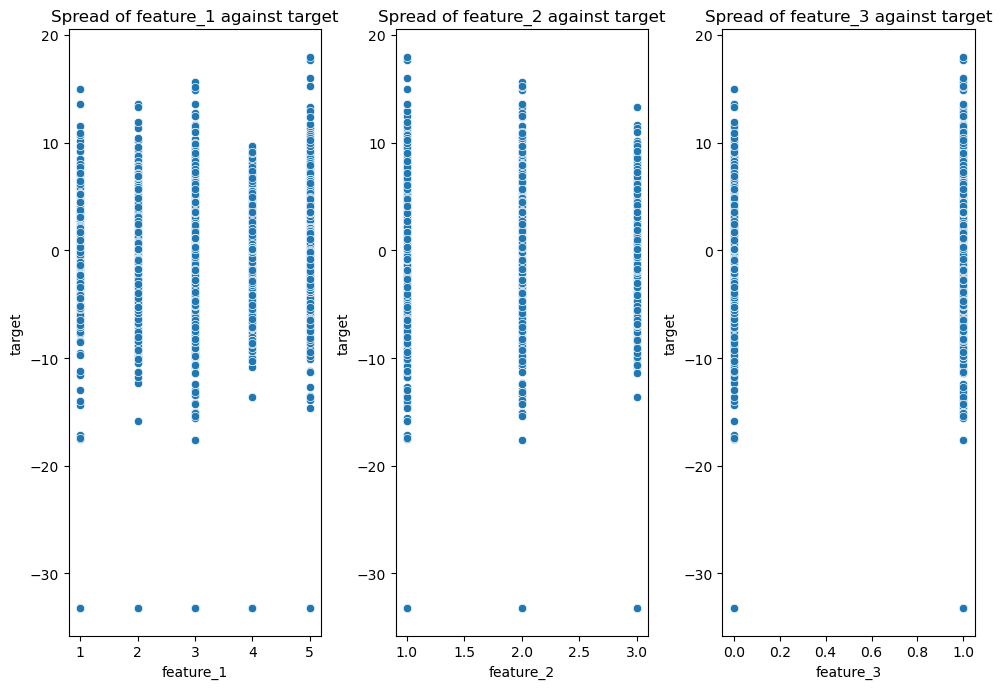

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(10, 7))

x = ['feature_1', 'feature_2', 'feature_3']
y = 'target'

sns.scatterplot(x=x[0], y=y, data=df_train, ax=axes[0])
axes[0].set_title(f'Spread of {x[0]} against target')

sns.scatterplot(x=x[1], y=y, data=df_train, ax=axes[1])
axes[1].set_title(f'Spread of {x[1]} against target')

sns.scatterplot(x=x[2], y=y, data=df_train, ax=axes[2])
axes[2].set_title(f'Spread of {x[2]} against target')

plt.tight_layout()
plt.show()

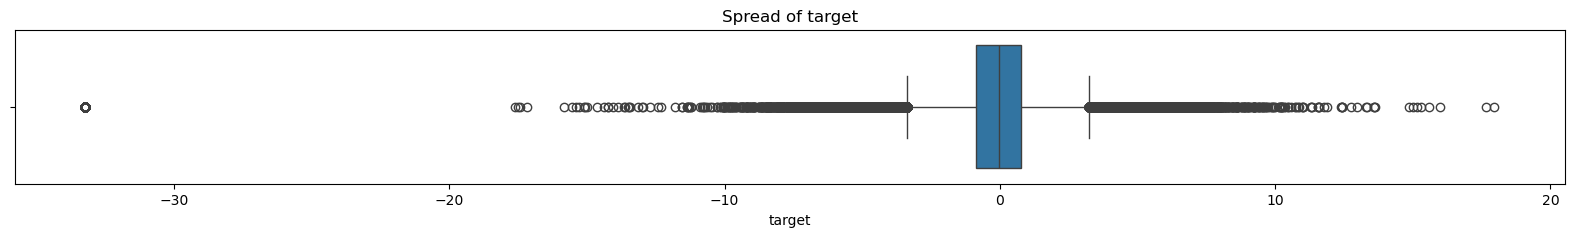

In [5]:
fig, axes = plt.subplots(1, figsize=(20,2))

sns.boxplot(data=df_train, x='target')
plt.title('Spread of target')
plt.show()

In [6]:
df_test = pd.read_csv('data/test.csv')
df_test.head()

,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04,C_ID_0ab67a22ab,3,3,1
1,2017-01,C_ID_130fd0cbdd,2,3,0
2,2017-08,C_ID_b709037bc5,5,1,1
3,2017-12,C_ID_d27d835a9f,2,1,0
4,2015-12,C_ID_2b5e3df5c2,5,1,1


In [7]:
df_test.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123623 entries, 0 to 123622
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   first_active_month  123622 non-null  object
 1   card_id             123623 non-null  object
 2   feature_1           123623 non-null  int64 
 3   feature_2           123623 non-null  int64 
 4   feature_3           123623 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 4.7+ MB


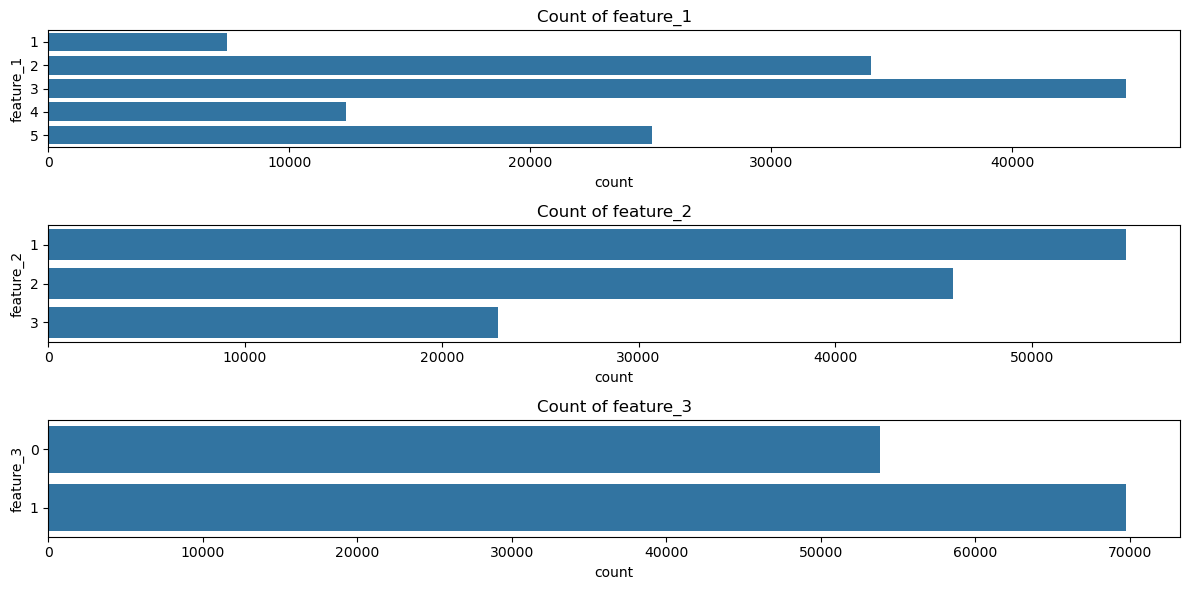

In [8]:
fig, axes = plt.subplots(3, figsize=(12, 6))

sns.countplot(data=df_test, y='feature_1', ax=axes[0])
axes[0].set_title('Count of feature_1')

sns.countplot(data=df_test, y='feature_2', ax=axes[1])
axes[1].set_title('Count of feature_2')

sns.countplot(data=df_test, y='feature_3', ax=axes[2])
axes[2].set_title('Count of feature_3')

plt.tight_layout()
plt.show()

In [9]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] 
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes 
        if col_type in numerics: 
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64) 
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float32).max: 
                    df[col] = df[col].astype(np.float32)
                #elif c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max: 
                    #df[col] = df[col].astype(np.float16)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1%} reduction)'.format(end_mem, (start_mem-end_mem)/start_mem))
    return df

def convert_type(df, feat_dict={}):
    for feature in df.columns.tolist():
        # Specify desired type for that feature name
        if feature in feat_dict.keys():
            df[feature] = df[feature].astype(feat_dict[feature])

def fill_na(df):
    for feature in df.columns.tolist():
        if (df[feature].dtype == 'object') or (df[feature].dtype == 'bool'):
            df[feature] = df[feature].fillna(df[feature].mode()[0])
        else:
            df[feature] = df[feature].replace([np.inf, -np.inf], np.nan)
            df[feature] = df[feature].fillna(df[feature].mean())
            #df[feature] = df[feature].fillna(df[feature].mode()[0])

In [10]:
df_test['first_active_month'] = df_test['first_active_month'].fillna(df_test['first_active_month'].mode()[0])
df_test.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123623 entries, 0 to 123622
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   first_active_month  123623 non-null  object
 1   card_id             123623 non-null  object
 2   feature_1           123623 non-null  int64 
 3   feature_2           123623 non-null  int64 
 4   feature_3           123623 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 4.7+ MB


# Feature engineering of train and test

In [11]:
for df in [df_train, df_test]:
    df['first_active_month'] = pd.to_datetime(df['first_active_month'])
    df['year_of_first_active'] = df['first_active_month'].dt.year
    df['quarter_of_first_active'] = df['first_active_month'].dt.quarter
    df['month_of_first_active'] = df['first_active_month'].dt.month
    df['active_days'] = (pd.to_datetime('2018-02-01') - df['first_active_month']).dt.days #1st Feb 2018 when elo started rec

    df.drop(columns='first_active_month', axis=1, inplace=True)

In [12]:
convert_type(df_train)
df_train.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   card_id                  201917 non-null  object 
 1   feature_1                201917 non-null  int64  
 2   feature_2                201917 non-null  int64  
 3   feature_3                201917 non-null  int64  
 4   target                   201917 non-null  float64
 5   year_of_first_active     201917 non-null  int32  
 6   quarter_of_first_active  201917 non-null  int32  
 7   month_of_first_active    201917 non-null  int32  
 8   active_days              201917 non-null  int64  
dtypes: float64(1), int32(3), int64(4), object(1)
memory usage: 11.6+ MB


In [13]:
convert_type(df_test)
df_test.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123623 entries, 0 to 123622
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   card_id                  123623 non-null  object
 1   feature_1                123623 non-null  int64 
 2   feature_2                123623 non-null  int64 
 3   feature_3                123623 non-null  int64 
 4   year_of_first_active     123623 non-null  int32 
 5   quarter_of_first_active  123623 non-null  int32 
 6   month_of_first_active    123623 non-null  int32 
 7   active_days              123623 non-null  int64 
dtypes: int32(3), int64(4), object(1)
memory usage: 6.1+ MB


In [14]:
df_merchants = pd.read_csv('data/merchants.csv')
df_merchants.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334696 entries, 0 to 334695
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   merchant_id                  334696 non-null  object 
 1   merchant_group_id            334696 non-null  int64  
 2   merchant_category_id         334696 non-null  int64  
 3   subsector_id                 334696 non-null  int64  
 4   numerical_1                  334696 non-null  float64
 5   numerical_2                  334696 non-null  float64
 6   category_1                   334696 non-null  object 
 7   most_recent_sales_range      334696 non-null  object 
 8   most_recent_purchases_range  334696 non-null  object 
 9   avg_sales_lag3               334683 non-null  float64
 10  avg_purchases_lag3           334696 non-null  float64
 11  active_months_lag3           334696 non-null  int64  
 12  avg_sales_lag6               334683 non-null  float64
 13 

In [15]:
convert_type(df_merchants)
df_merchants['category_2'] = df_merchants['category_2'].fillna(1.0)

for f in ['avg_sales_lag3','avg_sales_lag6','avg_sales_lag12']:
    df_merchants[f] = df_merchants[f].fillna(df_merchants[f].mean())

for f in ['avg_purchases_lag3','avg_purchases_lag6','avg_purchases_lag12']:
    df_merchants[f] = df_merchants[f].replace([np.inf, -np.inf], np.nan)
    df_merchants[f] = df_merchants[f].fillna(df_merchants[f].mean())

#df_merchants = reduce_mem_usage(df_merchants)
df_merchants.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334696 entries, 0 to 334695
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   merchant_id                  334696 non-null  object 
 1   merchant_group_id            334696 non-null  int64  
 2   merchant_category_id         334696 non-null  int64  
 3   subsector_id                 334696 non-null  int64  
 4   numerical_1                  334696 non-null  float64
 5   numerical_2                  334696 non-null  float64
 6   category_1                   334696 non-null  object 
 7   most_recent_sales_range      334696 non-null  object 
 8   most_recent_purchases_range  334696 non-null  object 
 9   avg_sales_lag3               334696 non-null  float64
 10  avg_purchases_lag3           334696 non-null  float64
 11  active_months_lag3           334696 non-null  int64  
 12  avg_sales_lag6               334696 non-null  float64
 13 

In [16]:
df_hist = pd.read_csv('data/historical_transactions.csv')
df_hist.drop(columns=[feat for feat in df_merchants.columns.tolist() if feat in df_hist.columns.tolist() and feat != 'merchant_id'], inplace=True)
df_hist.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29112361 entries, 0 to 29112360
Data columns (total 8 columns):
 #   Column           Non-Null Count     Dtype  
---  ------           --------------     -----  
 0   authorized_flag  29112361 non-null  object 
 1   card_id          29112361 non-null  object 
 2   installments     29112361 non-null  int64  
 3   category_3       28934202 non-null  object 
 4   merchant_id      28973880 non-null  object 
 5   month_lag        29112361 non-null  int64  
 6   purchase_amount  29112361 non-null  float64
 7   purchase_date    29112361 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.7+ GB


In [17]:
df_hist['category_3'] = df_hist['category_3'].fillna('A')
df_hist['merchant_id'] = df_hist['merchant_id'].fillna('M_ID_00a6ca8a8a')
#df_hist = reduce_mem_usage(df_hist)
df_hist.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29112361 entries, 0 to 29112360
Data columns (total 8 columns):
 #   Column           Non-Null Count     Dtype  
---  ------           --------------     -----  
 0   authorized_flag  29112361 non-null  object 
 1   card_id          29112361 non-null  object 
 2   installments     29112361 non-null  int64  
 3   category_3       29112361 non-null  object 
 4   merchant_id      29112361 non-null  object 
 5   month_lag        29112361 non-null  int64  
 6   purchase_amount  29112361 non-null  float64
 7   purchase_date    29112361 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.7+ GB


In [18]:
df_hist_merch = pd.merge(df_hist, df_merchants, on='merchant_id', how='left')
df_hist_merch.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30472261 entries, 0 to 30472260
Data columns (total 29 columns):
 #   Column                       Non-Null Count     Dtype  
---  ------                       --------------     -----  
 0   authorized_flag              30472261 non-null  object 
 1   card_id                      30472261 non-null  object 
 2   installments                 30472261 non-null  int64  
 3   category_3                   30472261 non-null  object 
 4   merchant_id                  30472261 non-null  object 
 5   month_lag                    30472261 non-null  int64  
 6   purchase_amount              30472261 non-null  float64
 7   purchase_date                30472261 non-null  object 
 8   merchant_group_id            30472261 non-null  int64  
 9   merchant_category_id         30472261 non-null  int64  
 10  subsector_id                 30472261 non-null  int64  
 11  numerical_1                  30472261 non-null  float64
 12  numerical_2               

In [19]:
df_new = pd.read_csv('data/new_merchant_transactions.csv')
df_new.drop(columns=[feat for feat in df_merchants.columns.tolist() if feat in df_new.columns.tolist() and feat != 'merchant_id'], inplace=True)
df_new.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1963031 entries, 0 to 1963030
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   authorized_flag  1963031 non-null  object 
 1   card_id          1963031 non-null  object 
 2   installments     1963031 non-null  int64  
 3   category_3       1907109 non-null  object 
 4   merchant_id      1936815 non-null  object 
 5   month_lag        1963031 non-null  int64  
 6   purchase_amount  1963031 non-null  float64
 7   purchase_date    1963031 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 119.8+ MB


In [20]:
df_new['category_3'] = df_new['category_3'].fillna('A')
df_new['merchant_id'] = df_new['merchant_id'].fillna('M_ID_00a6ca8a8a')
#df_new = reduce_mem_usage(df_new)
df_new.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1963031 entries, 0 to 1963030
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   authorized_flag  1963031 non-null  object 
 1   card_id          1963031 non-null  object 
 2   installments     1963031 non-null  int64  
 3   category_3       1963031 non-null  object 
 4   merchant_id      1963031 non-null  object 
 5   month_lag        1963031 non-null  int64  
 6   purchase_amount  1963031 non-null  float64
 7   purchase_date    1963031 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 119.8+ MB


In [21]:
df_new_merch = pd.merge(df_new, df_merchants, on='merchant_id', how='left')
df_new_merch.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2021111 entries, 0 to 2021110
Data columns (total 29 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   authorized_flag              2021111 non-null  object 
 1   card_id                      2021111 non-null  object 
 2   installments                 2021111 non-null  int64  
 3   category_3                   2021111 non-null  object 
 4   merchant_id                  2021111 non-null  object 
 5   month_lag                    2021111 non-null  int64  
 6   purchase_amount              2021111 non-null  float64
 7   purchase_date                2021111 non-null  object 
 8   merchant_group_id            2021111 non-null  int64  
 9   merchant_category_id         2021111 non-null  int64  
 10  subsector_id                 2021111 non-null  int64  
 11  numerical_1                  2021111 non-null  float64
 12  numerical_2                  2021111 non-n

# Dissect Dates

In [22]:
def get_time_of_day(time):
  if 4 <= time.hour < 12:
    return "Morning"
  elif 12 <= time.hour < 17:
    return "Afternoon"
  elif 17 <= time.hour < 22:
    return "Evening"
  else:
    return "Night"

holiday_dates=['01-01-17', '14-02-17', '28-08-17', '14-04-17', '16-04-17', '21-04-17',
            '01-05-17', '15-06-17', '07-09-17', '12-10-17', '02-11-17', '15-11-17', 
            '24-12-17', '25-12-17', '31-12-17',
            '01-01-18', '14-02-18', '28-08-18', '14-04-18', '16-04-18', '21-04-18',
            '01-05-18', '15-06-18', '07-09-18', '12-10-18', '02-11-18', '15-11-18', 
            '24-12-18', '25-12-18', '31-12-18']

holiday_dates = pd.to_datetime(holiday_dates)

for df in [df_hist_merch, df_new_merch]:
    df['purchase_date'] = pd.to_datetime(df['purchase_date'])
    df['days_since_purchase'] = (pd.to_datetime('2018-02-01')-df['purchase_date']).dt.days.astype('int16')
    df['purchase_year'] = df['purchase_date'].dt.year
    df['purchase_week_of_year'] = df['purchase_date'].dt.isocalendar().week
    df['purchase_quarter'] = df['purchase_date'].dt.quarter
    df['purchase_month'] = df['purchase_date'].dt.month
    df['purchase_day'] = df['purchase_date'].dt.day
    df['purchase_day_of_week'] = df['purchase_date'].dt.dayofweek
    df['purchase_on_weekend'] = (df['purchase_date'].dt.weekday>=5)
    df['purchase_hour'] = df['purchase_date'].dt.hour
    df['purchase_time_of_day'] = df['purchase_date'].apply(get_time_of_day)
    df['purchase_during_holiday'] = df['purchase_date'].isin(holiday_dates)

    df.drop(columns='purchase_date', axis=1, inplace=True)

C:\Users\SQ\AppData\Local\Temp\ipykernel_27716\161140300.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  holiday_dates = pd.to_datetime(holiday_dates)


# Encoding Features

In [23]:
encoded_features = ['category_1','category_2','category_3','category_4',
                    'authorized_flag','most_recent_sales_range','most_recent_purchases_range']  

df_hist_merch_en = pd.get_dummies(df_hist_merch, columns=encoded_features)
df_new_merch_en = pd.get_dummies(df_new_merch, columns=encoded_features)

#df_hist_merch = reduce_mem_usage(df_hist_merch)
#df_new_merch = reduce_mem_usage(df_new_merch)

# Aggregation

In [25]:
def agg_features(df):
    agg_func = {}
    
    for feat in df.columns.tolist():
        if feat in ['card_id']:
            agg_func[feat] = ['nunique']  
        elif feat in ['purchase_date']:
            continue
        elif feat in ['month_lag','installments','purchase_amount',
                      'numerical_1','numerical_2','days_since_purchase',
                    'avg_sales_lag3','avg_purchases_lag3','active_months_lag3',
                    'avg_sales_lag6','avg_purchases_lag6','active_months_lag6',
                    'avg_sales_lag12','avg_purchases_lag12','active_months_lag12']:
            agg_func[feat] = ['sum','mean','min','max','var','std','nunique',lambda x: x.mode().iloc[0]]
        elif feat in ['purchase_year','purchase_week_of_year','purchase_quarter',
                      'purchase_month','purchase_day','purchase_day_of_week','purchase_hour']:
            agg_func[feat] = ['mean','min','max','nunique',lambda x: x.mode().iloc[0]]
        else:
            agg_func[feat] = ['nunique',lambda x: x.mode().iloc[0]]

    df = df.groupby('card_id', observed=False).agg(agg_func)
    df.columns = [f'{col}_{agg}' for col, agg in df.columns]
    df.columns = df.columns.str.replace('_<lambda_0>', '_mode', regex=False)
    df.columns = df.columns.str.replace('_<lambda>', '', regex=False)
    return df.reset_index()

In [26]:
# ~45mins to run
df_hist_merch_agg = agg_features(df_hist_merch_en)

In [68]:
# ~45mins to run
df_new_merch_agg = agg_features(df_new_merch_en)

In [28]:
df_combined = pd.concat([df_hist_merch_en, df_new_merch_en], axis=0)
df_combined_agg = agg_features(df_combined)

# Merge with Train/Test Data

In [69]:
train_merge1 = pd.merge(df_train, df_hist_merch_agg, on='card_id', how='left')
train_merge1.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Columns: 231 entries, card_id to most_recent_purchases_range_E_mode
dtypes: Float64(1), UInt32(3), bool(26), float64(88), int16(3), int32(21), int64(86), object(3)
memory usage: 299.6+ MB


In [70]:
train_merge2 = pd.merge(train_merge1, df_new_merch_agg, on='card_id', how='left')
train_merge2.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Columns: 451 entries, card_id to most_recent_purchases_range_E_mode_y
dtypes: Float64(2), UInt32(6), bool(26), float64(277), int16(3), int32(21), int64(86), object(30)
memory usage: 637.0+ MB


In [71]:
test_merge1 = pd.merge(df_test, df_hist_merch_agg, on='card_id', how='left')
test_merge1.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123623 entries, 0 to 123622
Columns: 230 entries, card_id to most_recent_purchases_range_E_mode
dtypes: Float64(1), UInt32(3), bool(26), float64(87), int16(3), int32(21), int64(86), object(3)
memory usage: 182.5+ MB


In [72]:
train_merge3 = pd.merge(train_merge2, df_combined_agg, on='card_id', how='left')
train_merge3.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Columns: 673 entries, card_id to most_recent_purchases_range_E_mode
dtypes: Float64(3), UInt32(9), bool(52), float64(364), int16(6), int32(39), int64(168), object(32)
memory usage: 925.1+ MB


In [73]:
# One feature supposedly to be float is UInt32, can't find out which is it
for f in train_merge3.columns.tolist():
    if train_merge3[f].dtype == 'UInt32':
        train_merge3[f] = train_merge3[f].astype('float32')

train_merge3.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Columns: 673 entries, card_id to most_recent_purchases_range_E_mode
dtypes: Float64(3), bool(52), float32(9), float64(364), int16(6), int32(39), int64(168), object(32)
memory usage: 923.3+ MB


In [74]:
test_merge2 = pd.merge(test_merge1, df_new_merch_agg, on='card_id', how='left')
test_merge2.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123623 entries, 0 to 123622
Columns: 450 entries, card_id to most_recent_purchases_range_E_mode_y
dtypes: Float64(2), UInt32(6), bool(26), float64(276), int16(3), int32(21), int64(86), object(30)
memory usage: 389.1+ MB


In [75]:
test_merge3 = pd.merge(test_merge2, df_combined_agg, on='card_id', how='left')
test_merge3.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123623 entries, 0 to 123622
Columns: 672 entries, card_id to most_recent_purchases_range_E_mode
dtypes: Float64(3), UInt32(9), bool(52), float64(363), int16(6), int32(39), int64(168), object(32)
memory usage: 565.4+ MB


In [76]:
# One feature supposedly to be float is UInt32, can't find out which is it
for f in test_merge3.columns.tolist():
    if test_merge3[f].dtype == 'UInt32':
        test_merge3[f] = test_merge3[f].astype('float32')

test_merge3.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123623 entries, 0 to 123622
Columns: 672 entries, card_id to most_recent_purchases_range_E_mode
dtypes: Float64(3), bool(52), float32(9), float64(363), int16(6), int32(39), int64(168), object(32)
memory usage: 564.4+ MB


In [77]:
train_merge3.to_csv('data/train_data.csv', index=False)

In [78]:
test_merge3.to_csv('data/test_data.csv', index=False)